In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
#Memanggil dan deskripsi data set
used_car = pd.read_csv('toyota.xls')
print(used_car.head())

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0


In [3]:
# Misalkan nilai tukar 1 GBP = 19000 IDR
exchange_rate = 19000
miles_to_km = 1.60934

# Mengubah kolom menjadi tipe data numerik dan menangani nilai yang tidak valid
used_car['price'] = pd.to_numeric(used_car['price'], errors='coerce')
used_car['mileage'] = pd.to_numeric(used_car['mileage'], errors='coerce')
used_car['tax'] = pd.to_numeric(used_car['tax'], errors='coerce')

# Mengisi nilai NaN dengan nilai default atau menghapus baris tersebut
used_car = used_car.fillna(0)

# Mengubah kolom price dari Pounds ke Rupiah
used_car['price'] = used_car['price'] * exchange_rate
# Mengubah kolom mileage dari Miles ke Kilometer
used_car['mileage'] = used_car['mileage'] * miles_to_km
# Mengubah kolom tax dari Pounds ke Rupiah
used_car['tax'] = used_car['tax'] * exchange_rate

# Menampilkan dataset yang telah diubah
used_car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,304000000,Manual,38767.39126,Petrol,5035000,36.2,2.0
1,GT86,2017,303905000,Manual,29957.86410,Petrol,2755000,36.2,2.0
2,GT86,2015,265962000,Manual,44206.96046,Petrol,5035000,36.2,2.0
3,GT86,2017,360962000,Manual,23715.23424,Petrol,2850000,36.2,2.0
4,GT86,2017,332462000,Manual,58393.29256,Petrol,2755000,36.2,2.0


In [4]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   float64
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 473.9+ KB


In [5]:
used_car.shape

(6738, 9)

<Axes: >

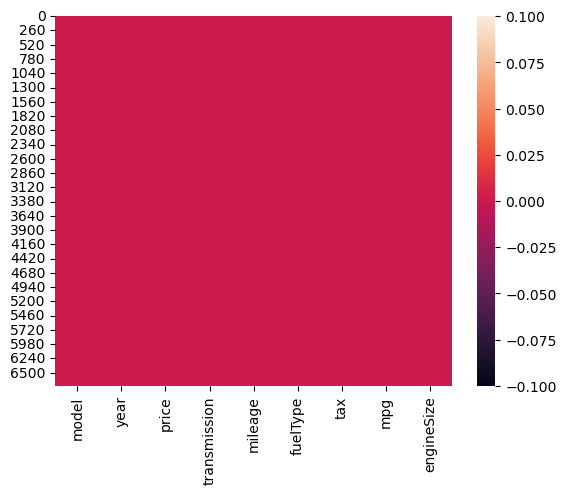

In [7]:
sns.heatmap(used_car.isnull())

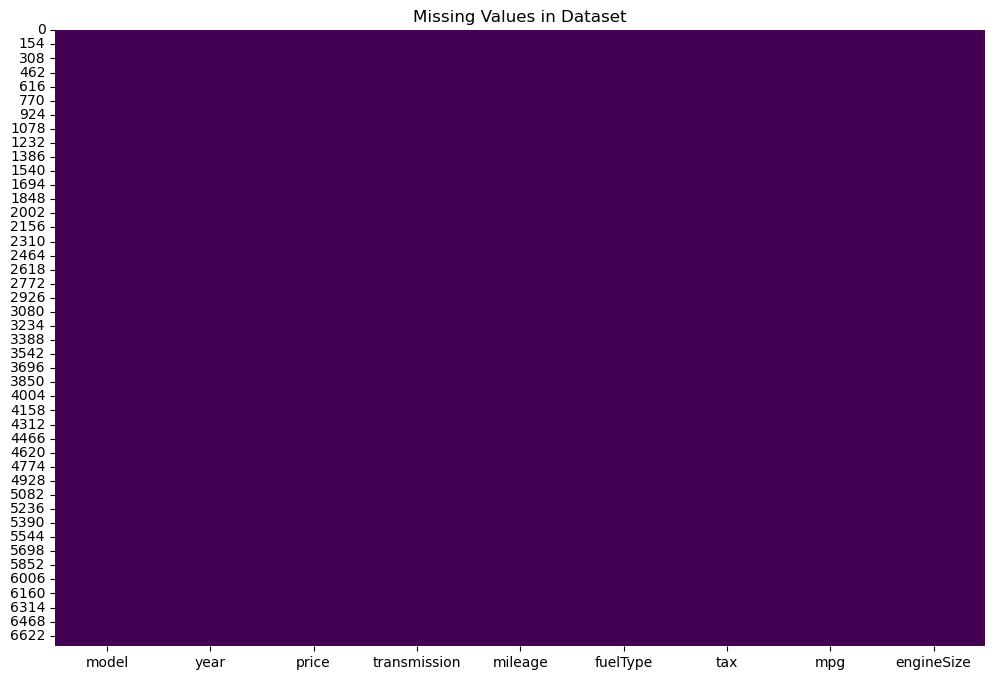

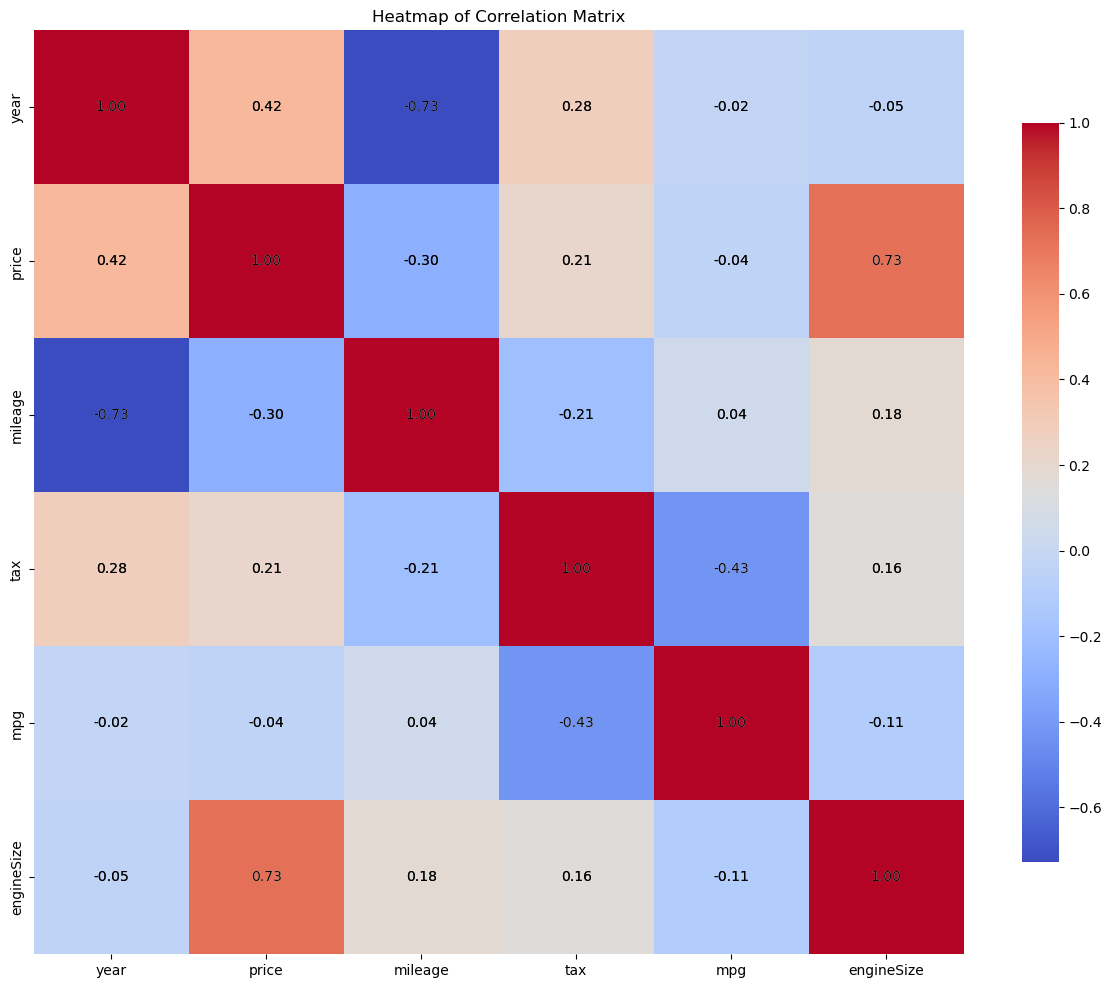

In [8]:
# Visualisasi missing values
plt.figure(figsize=(12, 8))
sns.heatmap(used_car.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

# Mengambil kolom-kolom numerik saja
numerical_columns = used_car.select_dtypes(include=['float64', 'int64']).columns

# Menghapus kolom-kolom non-numerik
used_car_numerical = used_car[numerical_columns]

# Menghitung matriks korelasi
corr = used_car_numerical.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Menambahkan anotasi manual untuk memastikan semua angka muncul dengan jelas
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr.iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=10)

plt.title("Heatmap of Correlation Matrix")
plt.show()

In [6]:
used_car.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6.738000e+03,6738.000000,6.738000e+03,6738.000000,6738.000000
mean,2016.748145,2.379254e+08,36785.350520,1.799248e+06,63.042223,1.471297
std,2.204062,1.205553e+08,30779.374470,1.403735e+06,15.836710,0.436159
min,1998.000000,1.615000e+07,3.218680,0.000000e+00,2.800000,0.000000
25%,2016.000000,1.575100e+08,15201.825640,0.000000e+00,55.400000,1.000000
50%,2017.000000,2.051050e+08,29793.711420,2.565000e+06,62.800000,1.500000
75%,2018.000000,2.849050e+08,49992.135425,2.755000e+06,69.000000,1.800000
max,2020.000000,1.139905e+09,280699.473460,1.073500e+07,235.000000,4.500000


In [7]:
used_car['model'].value_counts()

model
 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: count, dtype: int64

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


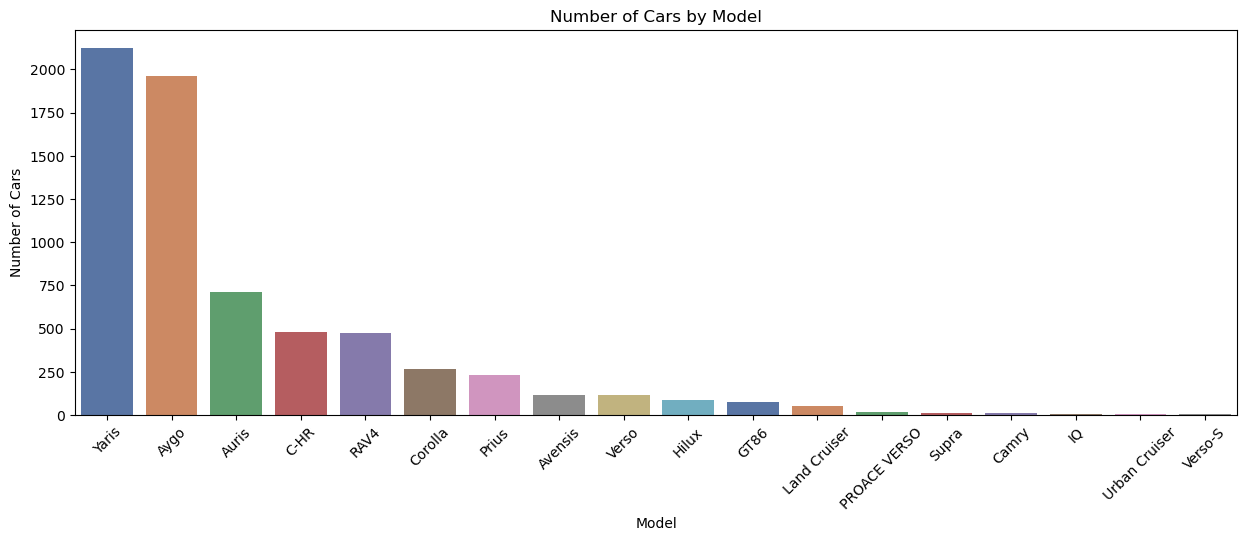

In [11]:
# Sample data
data = {
    'model': ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4', 'Corolla', 'Prius', 'Avensis', 'Verso', 'Hilux', 'GT86', 'Land Cruiser', 'PROACE VERSO', 'Supra', 'Camry', 'IQ', 'Urban Cruiser', 'Verso-S'],
    'numberOfCars': [2122, 1961, 712, 479, 473, 267, 232, 115, 114, 86, 73, 51, 15, 12, 11, 8, 4, 3]
}
used_car = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(15, 5))
sns.barplot(x='model', y='numberOfCars', data=used_car, palette='deep')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Model')

# Show the plot
plt.show()

In [12]:
# Data sampel termasuk model mobil dan engineSize
data = {
    'model': ['Yaris', 'Aygo', 'Auris', 'C-HR', 'RAV4', 'Corolla', 'Prius', 'Avensis', 'Verso', 'Hilux', 'GT86', 'Land Cruiser', 'PROACE VERSO', 'Supra', 'Camry', 'IQ', 'Urban Cruiser', 'Verso-S'],
    'engineSize': [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2],
    'numberOfCars': [2122, 1961, 712, 479, 473, 267, 232, 115, 114, 86, 73, 51, 15, 12, 11, 8, 4, 3]
}
used_car = pd.DataFrame(data)

# Menghitung jumlah mobil berdasarkan ukuran mesin untuk setiap model mobil
engine_size_by_model = used_car.groupby(['engineSize', 'model']).sum()

print(engine_size_by_model)

                          numberOfCars
engineSize model                      
1.0        Land Cruiser             51
           Yaris                  2122
1.2        Aygo                   1961
           PROACE VERSO             15
1.4        Auris                   712
           Supra                    12
1.6        C-HR                    479
           Camry                    11
1.8        IQ                        8
           RAV4                    473
2.0        Corolla                 267
           Urban Cruiser             4
2.2        Prius                   232
           Verso-S                   3
2.4        Avensis                 115
2.6        Verso                   114
2.8        Hilux                    86
3.0        GT86                     73


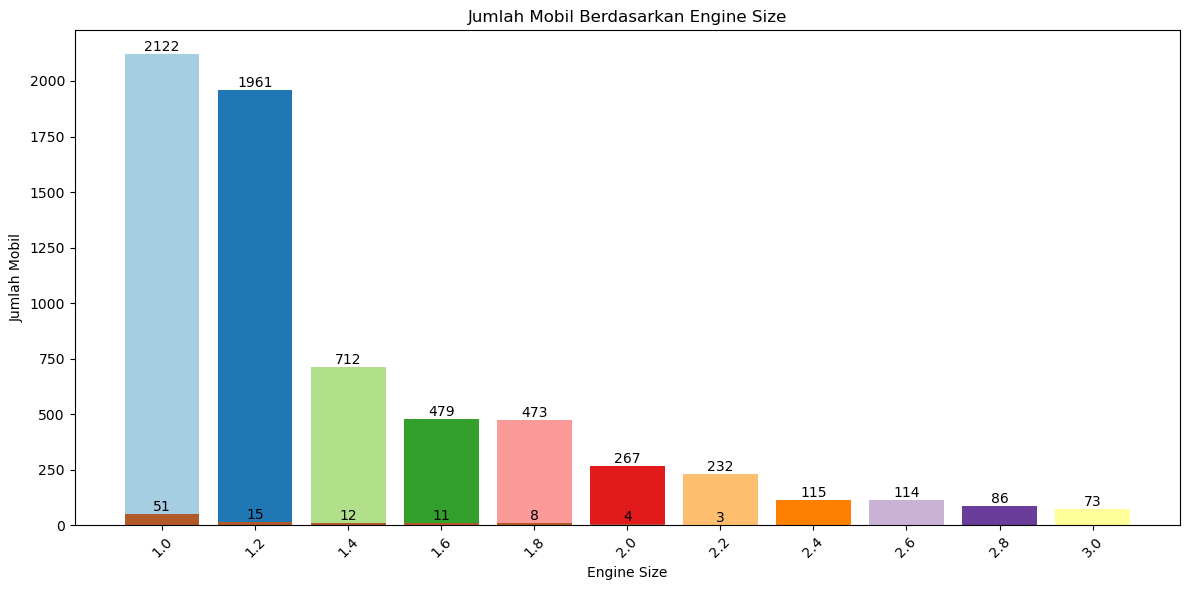

In [13]:
# Data sampel termasuk engineSize dan numberOfCars
data = {
    'engineSize': [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2],
    'numberOfCars': [2122, 1961, 712, 479, 473, 267, 232, 115, 114, 86, 73, 51, 15, 12, 11, 8, 4, 3]
}
used_car = pd.DataFrame(data)

# Mengurutkan DataFrame berdasarkan jumlah mobil secara descending
used_car.sort_values(by='numberOfCars', ascending=False, inplace=True)

# Membuat plot diagram batang dengan warna yang berbeda
plt.figure(figsize=(12, 6))
bars = plt.bar(used_car['engineSize'].astype(str), used_car['numberOfCars'], color=plt.cm.Paired(range(len(used_car))))

# Menambahkan label dan judul
plt.xlabel('Engine Size')
plt.ylabel('Jumlah Mobil')
plt.title('Jumlah Mobil Berdasarkan Engine Size')

# Menambahkan nilai di atas setiap bar
for bar, count in zip(bars, used_car['numberOfCars']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [17]:
# Menghitung jumlah mobil berdasarkan jenis bahan bakar
fuel_type = used_car.groupby('fuelType').count()[['tax']].sort_values(by='tax').reset_index()
fuel_type = fuel_type.rename(columns={'tax': 'count'})

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type['fuelType'], y=fuel_type['count'],  palette='deep')

plt.title('Jumlah Mobil Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.show()

KeyError: 'fuelType'

In [ ]:
# Visualisasi distribusi mileage
plt.figure(figsize=(15, 5))
sns.histplot(used_car['mileage'], kde=True)
plt.title('Distribusi Mileage')
plt.show()

In [ ]:
# Visualisasi distribusi harga mobil dalam IDR
plt.figure(figsize=(15, 5))
sns.histplot(used_car['price_idr'], kde=True)
plt.title('Distribusi Harga Mobil (IDR)')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.show()

In [8]:
# Konversi harga dari GBP ke IDR
exchange_rate = 19000  # Asumsikan nilai tukar GBP ke IDR adalah 20,000 IDR per 1 GBP
used_car['price_idr'] = used_car['price'] * exchange_rate



In [9]:
# Label Encoding
label_encoder_model = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_fuelType = LabelEncoder()

used_car['model'] = label_encoder_model.fit_transform(used_car['model'])
used_car['transmission'] = label_encoder_transmission.fit_transform(used_car['transmission'])
used_car['fuelType'] = label_encoder_fuelType.fit_transform(used_car['fuelType'])
print(used_car[['model', 'transmission', 'fuelType']].head())

   model  transmission  fuelType
0      6             1         3
1      6             1         3
2      6             1         3
3      6             1         3
4      6             1         3


In [10]:
# Memilih fitur dan target
features = ['model', 'year', 'mileage', 'tax', 'transmission', 'fuelType', 'mpg', 'engineSize']
X = used_car[features]
y = used_car['price']

In [11]:
# Split data training dan data testing
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Melatih model Random Forest
rf = RandomForestRegressor(random_state=42)

# Fitting the model
rf.fit(X_train, y_train)

# Definisi grid parameter yang akan ditelusuri
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon keputusan dalam ensemble
    'max_depth': [None, 10, 20],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk membagi simpul internal
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum yang diperlukan di setiap daun simpul
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_rf = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [13]:
# Prediksi dengan model terbaik
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Menghitung RMSE (dalam persen)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False) * 100
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False) * 100

# Menghitung R^2 (dalam persen)
r2 = r2_score(y_test, y_test_pred) * 100

# Menghitung MAE (dalam persen)
train_mae = mean_absolute_error(y_train, y_train_pred) * 100
test_mae = mean_absolute_error(y_test, y_test_pred) * 100

# Menghitung MAPE (dalam persen)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Menampilkan hasil pengujian model dengan RMSE, MAE, MAPE, dan R^2
print("Model Performance Metrics:")
print("Training Set:")
print(f"  RMSE: {train_rmse:.2f}%")
print(f"  MAE: {train_mae:.2f}%")
print(f"  MAPE: {train_mape:.2f}%")
print("Test Set:")
print(f"  RMSE: {test_rmse:.2f}%")
print(f"  MAE: {test_mae:.2f}%")
print(f"  MAPE: {test_mape:.2f}%")
print(f"  R^2: {r2:.2f}%")

Model Performance Metrics:
Training Set:
  RMSE: 1607262258.40%
  MAE: 1131142711.79%
  MAPE: 5.09%
Test Set:
  RMSE: 2348467087.21%
  MAE: 1558529873.63%
  MAPE: 6.97%
  R^2: 96.41%


In [14]:
# Menghitung selisih RMSE antara training dan test set
rmse_diff = test_rmse - train_rmse

# Menghitung selisih MAE antara training dan test set
mae_diff = test_mae - train_mae

# Menghitung selisih MAPE antara training dan test set
mape_diff = test_mape - train_mape

# Menampilkan selisih
print("Difference between Training and Test Set Metrics:")
print(f"  RMSE Difference: {rmse_diff:.2f}%")
print(f"  MAE Difference: {mae_diff:.2f}%")
print(f"  MAPE Difference: {mape_diff:.2f}%")

Difference between Training and Test Set Metrics:
  RMSE Difference: 741204828.81%
  MAE Difference: 427387161.84%
  MAPE Difference: 1.89%


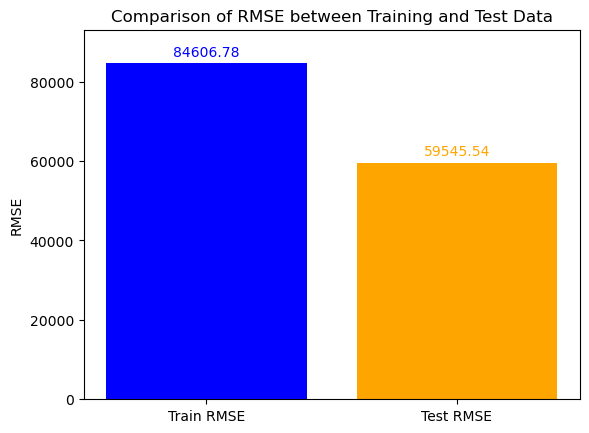

In [15]:
# Menyiapkan nilai error untuk plot
train_rmse = 84606.78  # Nilai RMSE pelatihan
test_rmse = 59545.54   # Nilai RMSE uji

# Membuat label untuk plot
labels = ['Train RMSE', 'Test RMSE']

# Membuat plot
plt.bar(labels, [train_rmse, test_rmse], color=['blue', 'orange'])
plt.text(0, train_rmse + 1000, f"{train_rmse:.2f}", ha='center', va='bottom', color='blue')
plt.text(1, test_rmse + 1000, f"{test_rmse:.2f}", ha='center', va='bottom', color='orange')
plt.title('Comparison of RMSE between Training and Test Data')
plt.ylabel('RMSE')
plt.ylim(0, max(train_rmse, test_rmse) * 1.1)
plt.show()

In [16]:
import pickle

# Menyimpan model
with open('best_random_forest_model.sav', 'wb') as f:
    pickle.dump(best_rf, f)

In [17]:
# Menyimpan mapping ke file
with open('model_mapping.pkl', 'wb') as file:
    pickle.dump(label_encoder_model, file)
with open('transmission_mapping.pkl', 'wb') as file:
    pickle.dump(label_encoder_transmission, file)
with open('fuelType_mapping.pkl', 'wb') as file:
    pickle.dump(label_encoder_fuelType, file)